* edge dislocation in 2D and 3D
* install ASE.jl to get ASEAtoms...
* test screw dislocation: seems work for 3D, 2D is different...

## Screw dislocation

# 3D edge dislocation

In [74]:
Pkg.add("ASE")

INFO: Cloning cache of ASE from https://github.com/libAtoms/ASE.jl.git
INFO: Installing ASE v0.1.1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] uuid4(::MersenneTwister) at ./deprecated.jl:57
 [3] msg_header at /Users/linan/.julia/v0.6/IJulia/src/msg.jl:18 [inlined]
 [4] msg_pub(::IJulia.Msg, ::String, ::Dict{String,String}, ::Dict{String,Any}) at /Users/linan/.julia/v0.6/IJulia/src/msg.jl:30 (repeats 2 times)
 [5] send_stream(::String) at /Users/linan/.julia/v0.6/IJulia/src/stdio.jl:172
 [6] send_stdio(::String) at /Users/linan/.julia/v0.6/IJulia/src/stdio.jl:130
 [7] (::Base.##302#303{IJulia.#send_stderr,Timer})() at ./event.jl:436
while loading In[74], in expression starting on line 1
INFO: Building SpecialFunctions
INFO: Building Dierckx


make: Nothing to be done for `all'.


INFO: Building Conda
INFO: Building PyCall
Info: Using the Python distribution in the Conda package by default.
To use a different Python version, set ENV["PYTHON"]="pythoncommand" and re-run Pkg.build("PyCall").
Info: Running `conda install -y numpy` in root environment


Solving environment: ...working... done

# All requested packages already installed.



Info: PyCall is using /Users/linan/.julia/v0.6/Conda/deps/usr/bin/python (Python 3.7.3) at /Users/linan/.julia/v0.6/Conda/deps/usr/bin/python, libpython = /Users/linan/.julia/v0.6/Conda/deps/usr/lib/libpython3.7m.dylib
Info: /Users/linan/.julia/v0.6/PyCall/deps/deps.jl has not changed
Info: /Users/linan/.julia/v0.6/PyCall/deps/PYTHON has not changed
INFO: Building ASE


Installing Dependencies of `ASE.jl`: `ase` and `matscipy`
`ase` was not found, trying to install via pip. If this fails,
please file an issue and try to install it manually, following
the instructions at `https://wiki.fysik.dtu.dk/ase/install.html`
pip 19.0.3 from /Users/linan/.julia/v0.6/Conda/deps/usr/lib/python3.7/site-packages/pip (python 3.7)


  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)")': /simple/flask/


  The script flask is installed in '/Users/linan/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  The scripts ase, ase-build, ase-db, ase-gui, ase-info and ase-run are installed in '/Users/linan/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


`matscipy` was not found, trying to install it. If this fails,
please file an issue and try to install it manually, following
the instructions at `https://github.com/libAtoms/matscipy`
pip 19.0.3 from /Users/linan/.julia/v0.6/Conda/deps/usr/lib/python3.7/site-packages/pip (python 3.7)
  Stored in directory: /Users/linan/Library/Caches/pip/wheels/57/3d/09/65d1ed841c16b6b1c7b4e4824e3ffc9c84df127207e3bd6caa
Successfully built matscipy


INFO: Package database updated


In [84]:
include("JuLIPMaterials.jl")
include("Si.jl")
include("CauchyBorn_Si.jl")

CauchyBorn

In [85]:
at, _, x0 = Si.si110_cluster("Si", 9)

(JuLIP.Atoms{Float64,Int64}
  X: Array{StaticArrays.SArray{Tuple{3},Float64,1,3}}((2916,))
  P: Array{StaticArrays.SArray{Tuple{3},Float64,1,3}}((2916,))
  M: Array{Float64}((2916,)) [28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085  …  28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085]
  Z: Array{Int64}((2916,)) [14, 14, 14, 14, 14, 14, 14, 14, 14, 14  …  14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
  cell: StaticArrays.SArray{Tuple{3,3},Float64,2,9}
  pbc: StaticArrays.SArray{Tuple{3},Bool,1,3}
  calc: JuLIP.NullCalculator JuLIP.NullCalculator()
  cons: JuLIP.NullConstraint JuLIP.NullConstraint()
  data: Dict{Any,JuLIP.JData}
, 3.839589821842953, [15.3183, 22.4988, 17.2782])

In [41]:
using JuLIP, PyPlot

In [42]:
function layers(at)
    dz = 1/(2*√2) * ( bulk(:Si, cubic=true) |> defm )[1,1]
    X = positions(at) |> mat
    x, y, z = X[1,:], X[2,:], X[3,:] 
    I0 = find(z .<= 0.5*dz)
    I1 = find(0.5*dz .< z .<= 1.5*dz)
    I2 = find(1.5*dz .< z .<= 2.5*dz)
    I3 = find(z .> 2.5*dz)
    return [x[I0]'; y[I0]'], [x[I1]'; y[I1]'], [x[I2]'; y[I2]'], [x[I3]'; y[I3]']
end 

function plot_layers(at, x0=nothing)
    X0, X1, X2, X3 = layers(at)
    plot(X0[1,:], X0[2,:], "b.", markersize=8)
    plot(X1[1,:], X1[2,:], "g.", markersize=8)
    plot(X2[1,:], X2[2,:], "r.", markersize=8)
    plot(X3[1,:], X3[2,:], "y.", markersize=8)
    if x0 != nothing 
        plot([x0[1]], [x0[2]], "r.", markersize=10)
    end 
end

plot_layers (generic function with 2 methods)

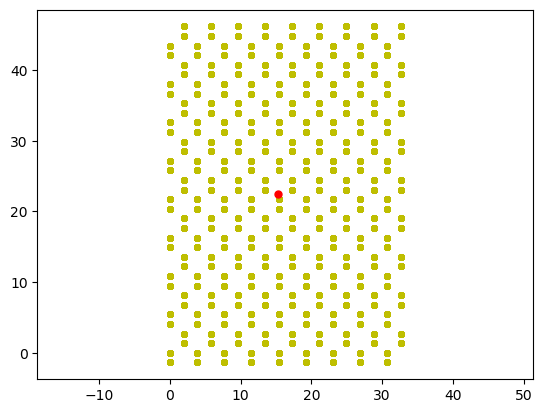

(-1.631825674283255, 34.268339159948354, -3.7331250000000002, 48.530625)

In [86]:
plot_layers(at, x0)
axis("equal")

In [91]:
atedge, xc = Si.edge110(:Si, 5)

(JuLIP.Atoms{Float64,Int64}
  X: Array{StaticArrays.SArray{Tuple{3},Float64,1,3}}((500,))
  P: Array{StaticArrays.SArray{Tuple{3},Float64,1,3}}((500,))
  M: Array{Float64}((500,)) [28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085  …  28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085]
  Z: Array{Int64}((500,)) [14, 14, 14, 14, 14, 14, 14, 14, 14, 14  …  14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
  cell: StaticArrays.SArray{Tuple{3,3},Float64,2,9}
  pbc: StaticArrays.SArray{Tuple{3},Bool,1,3}
  calc: JuLIP.Potentials.StillingerWeber{JuLIP.Potentials.Shift{-1,JuLIP.Potentials.AnalyticFunction{JuLIP.Potentials.##46#52{Float64,Float64,Float64,Float64,Int64,Float64},JuLIP.Potentials.##47#53{Float64,Float64,Float64,Float64,Int64,Float64},JuLIP.Potentials.##48#54{Float64,Float64,Float64,Float64,Int64,Float64}}},JuLIP.Potentials.Shift{-1,JuLIP.Potentials.AnalyticFunction{JuLIP.Potentials.##49#55{Float64,Float64,Float64,Float64,Float64},JuL

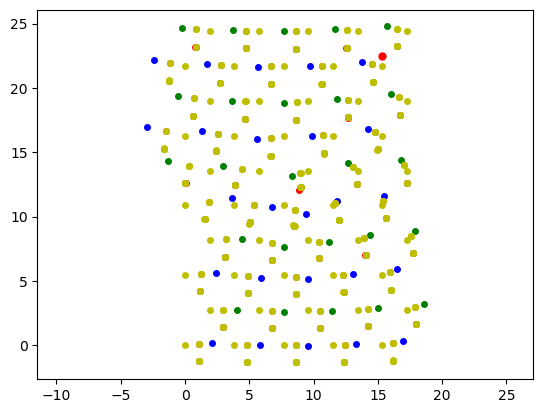

(-4.007571159869637, 19.635281430130842, -2.661205268309628, 26.087305495008625)

In [92]:
plot_layers(atedge, x0)
axis("equal")

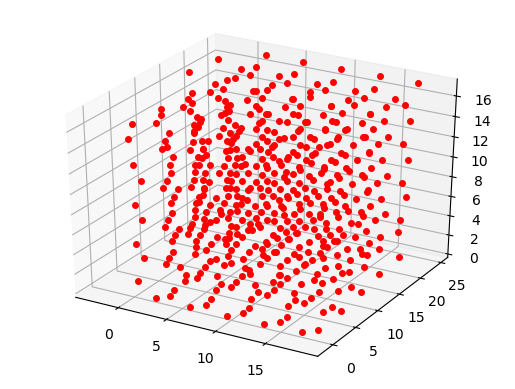

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x14f052860>

In [93]:
X = mat(atedge.X)
plot3D(X[1,:], X[2,:], X[3, :], "ro", markersize=4)

In [94]:
set_constraint!(atedge, FixedCell(atedge))

JuLIP.Atoms{Float64,Int64}
  X: Array{StaticArrays.SArray{Tuple{3},Float64,1,3}}((500,))
  P: Array{StaticArrays.SArray{Tuple{3},Float64,1,3}}((500,))
  M: Array{Float64}((500,)) [28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085  …  28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085, 28.085]
  Z: Array{Int64}((500,)) [14, 14, 14, 14, 14, 14, 14, 14, 14, 14  …  14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
  cell: StaticArrays.SArray{Tuple{3,3},Float64,2,9}
  pbc: StaticArrays.SArray{Tuple{3},Bool,1,3}
  calc: JuLIP.Potentials.StillingerWeber{JuLIP.Potentials.Shift{-1,JuLIP.Potentials.AnalyticFunction{JuLIP.Potentials.##46#52{Float64,Float64,Float64,Float64,Int64,Float64},JuLIP.Potentials.##47#53{Float64,Float64,Float64,Float64,Int64,Float64},JuLIP.Potentials.##48#54{Float64,Float64,Float64,Float64,Int64,Float64}}},JuLIP.Potentials.Shift{-1,JuLIP.Potentials.AnalyticFunction{JuLIP.Potentials.##49#55{Float64,Float64,Float64,Float64,Float64},JuLI

In [95]:
minimise!(atedge)

Results of Optimization Algorithm
 * Algorithm: Conjugate Gradient
 * Starting Point: [2.1348445968052383,0.14503728626073803, ...]
 * Minimizer: [0.7810905029023666,-0.45409066286238814, ...]
 * Minimum: -1.954033e+03
 * Iterations: 119
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 3.69e-06 
   * |f(x) - f(x')| ≤ 1.0e-32 |f(x)|: false
     |f(x) - f(x')| = -4.69e-14 |f(x)|
   * |g(x)| ≤ 1.0e-05: true 
     |g(x)| = 9.40e-06 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 242
 * Gradient Calls: 120


Results of Optimization Algorithm
 * Algorithm: Conjugate Gradient
 * Starting Point: [2.1348445968052383,0.14503728626073803, ...]
 * Minimizer: [0.7810905029023666,-0.45409066286238814, ...]
 * Minimum: -1.954033e+03
 * Iterations: 119
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 3.69e-06 
   * |f(x) - f(x')| ≤ 1.0e-32 |f(x)|: false
     |f(x) - f(x')| = -4.69e-14 |f(x)|
   * |g(x)| ≤ 1.0e-05: true 
     |g(x)| = 9.40e-06 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 242
 * Gradient Calls: 120

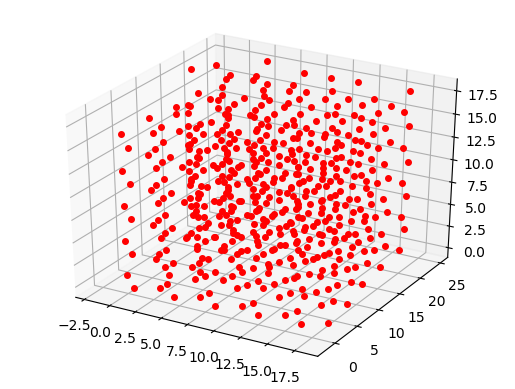

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x1474806a0>

In [96]:
X = mat(atedge.X)
plot3D(X[1,:], X[2,:], X[3, :], "ro", markersize=4)